In [1]:
# Parameters
global_seed = 88
save_results = True
benchmark_settings = {"benchmark_name": "pMNIST_via_torch", "difficulty": "standard", "num_tasks": 3, "train_percentage": 0.8, "num_val_benchmarks": 10, "batch_size": 128}
method_settings = {"method_name": "GroHess", "grow_from": "output", "hessian_percentile": 98, "grad_percentile": 98, "num_inputs": 784, "num_hidden_root": 200, "num_outputs": 10, "loss_name": "CE", "optimizer_name": "Adam"}
HPO_settings = {"HPO_name": "greedy_HPO", "n_trials": 20, "lr": [1e-05, 0.002], "num_epochs": [2, 20]}
visualization_settings = {"savefig": True, "visualize_accs_matrix": True, "visualize_avg_acc_curve": True, "visualize_best_params": True, "visualize_val_accs_matrix": True, "visualize_accuracy_through_benchmarks": True, "visualize_violin": True}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 98,
                   "grad_percentile" : 98,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 200,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 3,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (1, 3),
                #"ewc_lambda" : (100,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(3)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-19 16:05:07,561] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/11 [00:00<?, ?it/s]

  9%|██████████▍                                                                                                        | 1/11 [00:06<01:03,  6.30s/it]

 18%|████████████████████▉                                                                                              | 2/11 [00:12<00:55,  6.21s/it]

 27%|███████████████████████████████▎                                                                                   | 3/11 [00:17<00:46,  5.84s/it]

 36%|█████████████████████████████████████████▊                                                                         | 4/11 [00:23<00:39,  5.62s/it]

 45%|████████████████████████████████████████████████████▎                                                              | 5/11 [00:28<00:33,  5.58s/it]

 55%|██████████████████████████████████████████████████████████████▋                                                    | 6/11 [00:34<00:28,  5.70s/it]

 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 7/11 [00:40<00:23,  5.77s/it]

 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 8/11 [00:46<00:17,  5.83s/it]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 9/11 [00:52<00:11,  5.85s/it]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 10/11 [00:58<00:05,  5.88s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [01:04<00:00,  5.89s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [01:04<00:00,  5.84s/it]

[I 2024-07-19 16:06:13,198] Trial 0 finished with value: 97.52376344086017 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 11}. Best is trial 0 with value: 97.52376344086017.


  0%|                                                                                                                           | 0/19 [00:00<?, ?it/s]

  5%|██████                                                                                                             | 1/19 [00:05<01:40,  5.60s/it]

 11%|████████████                                                                                                       | 2/19 [00:10<01:32,  5.43s/it]

 16%|██████████████████▏                                                                                                | 3/19 [00:16<01:28,  5.52s/it]

 21%|████████████████████████▏                                                                                          | 4/19 [00:22<01:24,  5.66s/it]

 26%|██████████████████████████████▎                                                                                    | 5/19 [00:28<01:20,  5.75s/it]

 32%|████████████████████████████████████▎                                                                              | 6/19 [00:34<01:15,  5.81s/it]

 37%|██████████████████████████████████████████▎                                                                        | 7/19 [00:40<01:10,  5.85s/it]

 42%|████████████████████████████████████████████████▍                                                                  | 8/19 [00:46<01:04,  5.88s/it]

 47%|██████████████████████████████████████████████████████▍                                                            | 9/19 [00:52<00:58,  5.90s/it]

 53%|████████████████████████████████████████████████████████████                                                      | 10/19 [00:57<00:52,  5.88s/it]

 58%|██████████████████████████████████████████████████████████████████                                                | 11/19 [01:03<00:45,  5.71s/it]

 63%|████████████████████████████████████████████████████████████████████████                                          | 12/19 [01:08<00:39,  5.63s/it]

 68%|██████████████████████████████████████████████████████████████████████████████                                    | 13/19 [01:14<00:34,  5.69s/it]

 74%|████████████████████████████████████████████████████████████████████████████████████                              | 14/19 [01:20<00:29,  5.83s/it]

 79%|██████████████████████████████████████████████████████████████████████████████████████████                        | 15/19 [01:26<00:23,  5.89s/it]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████                  | 16/19 [01:32<00:17,  5.90s/it]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████            | 17/19 [01:38<00:11,  5.92s/it]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 18/19 [01:44<00:05,  5.97s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [01:50<00:00,  6.03s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [01:50<00:00,  5.83s/it]

[I 2024-07-19 16:08:05,418] Trial 1 finished with value: 97.86849462365583 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 19}. Best is trial 1 with value: 97.86849462365583.


  0%|                                                                                                                           | 0/15 [00:00<?, ?it/s]

  7%|███████▋                                                                                                           | 1/15 [00:05<01:19,  5.65s/it]

 13%|███████████████▎                                                                                                   | 2/15 [00:11<01:12,  5.59s/it]

 20%|███████████████████████                                                                                            | 3/15 [00:17<01:08,  5.71s/it]

 27%|██████████████████████████████▋                                                                                    | 4/15 [00:22<01:03,  5.79s/it]

 33%|██████████████████████████████████████▎                                                                            | 5/15 [00:29<00:59,  5.94s/it]

 40%|██████████████████████████████████████████████                                                                     | 6/15 [00:35<00:54,  6.04s/it]

 47%|█████████████████████████████████████████████████████▋                                                             | 7/15 [00:41<00:48,  6.06s/it]

 53%|█████████████████████████████████████████████████████████████▎                                                     | 8/15 [00:47<00:42,  6.13s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 9/15 [00:53<00:36,  6.10s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 10/15 [00:59<00:30,  6.09s/it]

 73%|███████████████████████████████████████████████████████████████████████████████████▌                              | 11/15 [01:05<00:23,  5.85s/it]

 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 12/15 [01:10<00:17,  5.77s/it]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▊               | 13/15 [01:17<00:11,  5.93s/it]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 14/15 [01:23<00:06,  6.12s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:29<00:00,  6.09s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:29<00:00,  5.98s/it]

[I 2024-07-19 16:09:36,468] Trial 2 finished with value: 97.07806451612902 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 15}. Best is trial 1 with value: 97.86849462365583.


  0%|                                                                                                                            | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▎                                                                                                | 1/6 [00:06<00:33,  6.60s/it]

 33%|██████████████████████████████████████▋                                                                             | 2/6 [00:12<00:25,  6.31s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 3/6 [00:18<00:18,  6.15s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 4/6 [00:24<00:12,  6.04s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 5/6 [00:29<00:05,  5.78s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:35<00:00,  5.67s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:35<00:00,  5.89s/it]

[I 2024-07-19 16:10:13,224] Trial 3 finished with value: 97.39731182795694 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 6}. Best is trial 1 with value: 97.86849462365583.


  0%|                                                                                                                           | 0/10 [00:00<?, ?it/s]

 10%|███████████▌                                                                                                       | 1/10 [00:06<00:57,  6.39s/it]

 20%|███████████████████████                                                                                            | 2/10 [00:12<00:50,  6.30s/it]

 30%|██████████████████████████████████▌                                                                                | 3/10 [00:18<00:43,  6.16s/it]

 40%|██████████████████████████████████████████████                                                                     | 4/10 [00:24<00:36,  6.10s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 5/10 [00:30<00:30,  6.06s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 6/10 [00:36<00:24,  6.04s/it]

 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 7/10 [00:42<00:17,  6.00s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 8/10 [00:47<00:11,  5.76s/it]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 9/10 [00:53<00:05,  5.61s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.59s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.86s/it]

[I 2024-07-19 16:11:13,206] Trial 4 finished with value: 97.16225806451612 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 10}. Best is trial 1 with value: 97.86849462365583.


  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:05<00:05,  5.93s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.93s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.93s/it]

[I 2024-07-19 16:11:26,460] Trial 5 finished with value: 96.39709677419353 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 1 with value: 97.86849462365583.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

  6%|██████▍                                                                                                            | 1/18 [00:05<01:40,  5.93s/it]

 11%|████████████▊                                                                                                      | 2/18 [00:11<01:34,  5.92s/it]

 17%|███████████████████▏                                                                                               | 3/18 [00:17<01:28,  5.92s/it]

 22%|█████████████████████████▌                                                                                         | 4/18 [00:23<01:22,  5.92s/it]

 28%|███████████████████████████████▉                                                                                   | 5/18 [00:29<01:14,  5.74s/it]

 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:34<01:06,  5.57s/it]

 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:39<01:00,  5.52s/it]

 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:45<00:55,  5.56s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:51<00:51,  5.67s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:57<00:45,  5.75s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:03<00:40,  5.81s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:09<00:35,  5.84s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:15<00:29,  5.87s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:20<00:23,  5.89s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:26<00:17,  5.84s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:31<00:11,  5.67s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:37<00:05,  5.64s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:43<00:00,  5.70s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:43<00:00,  5.74s/it]

[I 2024-07-19 16:13:11,239] Trial 6 finished with value: 97.09537634408598 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 18}. Best is trial 1 with value: 97.86849462365583.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

  6%|██████▍                                                                                                            | 1/18 [00:05<01:40,  5.93s/it]

 11%|████████████▊                                                                                                      | 2/18 [00:11<01:34,  5.93s/it]

 17%|███████████████████▏                                                                                               | 3/18 [00:17<01:28,  5.93s/it]

 22%|█████████████████████████▌                                                                                         | 4/18 [00:23<01:22,  5.93s/it]

 28%|███████████████████████████████▉                                                                                   | 5/18 [00:29<01:16,  5.91s/it]

 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:35<01:10,  5.90s/it]

 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:40<01:02,  5.69s/it]

 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:46<00:55,  5.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:51<00:50,  5.60s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:57<00:45,  5.70s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:03<00:40,  5.78s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:09<00:34,  5.83s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:15<00:29,  5.86s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:21<00:23,  5.88s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:27<00:17,  5.90s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:33<00:11,  5.85s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:38<00:05,  5.67s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:43<00:00,  5.57s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:43<00:00,  5.76s/it]

[I 2024-07-19 16:14:56,357] Trial 7 finished with value: 97.87612903225802 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 18}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                            | 0/9 [00:00<?, ?it/s]

 11%|████████████▉                                                                                                       | 1/9 [00:05<00:47,  6.00s/it]

 22%|█████████████████████████▊                                                                                          | 2/9 [00:12<00:42,  6.08s/it]

 33%|██████████████████████████████████████▋                                                                             | 3/9 [00:18<00:36,  6.08s/it]

 44%|███████████████████████████████████████████████████▌                                                                | 4/9 [00:24<00:30,  6.02s/it]

 56%|████████████████████████████████████████████████████████████████▍                                                   | 5/9 [00:30<00:23,  6.00s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 6/9 [00:36<00:17,  5.98s/it]

 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 7/9 [00:42<00:11,  5.98s/it]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 8/9 [00:47<00:05,  5.89s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:53<00:00,  5.78s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:53<00:00,  5.92s/it]

[I 2024-07-19 16:15:50,863] Trial 8 finished with value: 97.38053763440855 and parameters: {'lr': 0.00062159453834169, 'num_epochs': 9}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:17,  5.75s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.98s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:18<00:06,  6.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:24<00:00,  6.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:24<00:00,  6.05s/it]

[I 2024-07-19 16:16:16,438] Trial 9 finished with value: 96.85946236559136 and parameters: {'lr': 0.0011670770284524868, 'num_epochs': 4}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/15 [00:00<?, ?it/s]

  7%|███████▋                                                                                                           | 1/15 [00:06<01:26,  6.15s/it]

 13%|███████████████▎                                                                                                   | 2/15 [00:12<01:19,  6.15s/it]

 20%|███████████████████████                                                                                            | 3/15 [00:18<01:13,  6.16s/it]

 27%|██████████████████████████████▋                                                                                    | 4/15 [00:24<01:06,  6.01s/it]

 33%|██████████████████████████████████████▎                                                                            | 5/15 [00:29<00:58,  5.84s/it]

 40%|██████████████████████████████████████████████                                                                     | 6/15 [00:35<00:52,  5.81s/it]

 47%|█████████████████████████████████████████████████████▋                                                             | 7/15 [00:41<00:47,  5.97s/it]

 53%|█████████████████████████████████████████████████████████████▎                                                     | 8/15 [00:47<00:42,  6.02s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 9/15 [00:54<00:36,  6.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 10/15 [01:00<00:30,  6.02s/it]

 73%|███████████████████████████████████████████████████████████████████████████████████▌                              | 11/15 [01:05<00:23,  5.99s/it]

 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 12/15 [01:11<00:17,  5.97s/it]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▊               | 13/15 [01:17<00:11,  5.94s/it]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 14/15 [01:23<00:05,  5.74s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:28<00:00,  5.61s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:28<00:00,  5.89s/it]

[I 2024-07-19 16:17:46,252] Trial 10 finished with value: 97.7081720430107 and parameters: {'lr': 0.0006769809292322541, 'num_epochs': 15}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/20 [00:00<?, ?it/s]

  5%|█████▊                                                                                                             | 1/20 [00:05<01:52,  5.92s/it]

 10%|███████████▌                                                                                                       | 2/20 [00:11<01:46,  5.93s/it]

 15%|█████████████████▎                                                                                                 | 3/20 [00:17<01:40,  5.93s/it]

 20%|███████████████████████                                                                                            | 4/20 [00:23<01:34,  5.93s/it]

 25%|████████████████████████████▊                                                                                      | 5/20 [00:29<01:29,  5.94s/it]

 30%|██████████████████████████████████▌                                                                                | 6/20 [00:35<01:23,  5.93s/it]

 35%|████████████████████████████████████████▎                                                                          | 7/20 [00:41<01:17,  5.93s/it]

 40%|██████████████████████████████████████████████                                                                     | 8/20 [00:47<01:09,  5.80s/it]

 45%|███████████████████████████████████████████████████▊                                                               | 9/20 [00:52<01:01,  5.63s/it]

 50%|█████████████████████████████████████████████████████████                                                         | 10/20 [00:57<00:55,  5.58s/it]

 55%|██████████████████████████████████████████████████████████████▋                                                   | 11/20 [01:03<00:50,  5.64s/it]

 60%|████████████████████████████████████████████████████████████████████▍                                             | 12/20 [01:09<00:45,  5.73s/it]

 65%|██████████████████████████████████████████████████████████████████████████                                        | 13/20 [01:15<00:40,  5.79s/it]

 70%|███████████████████████████████████████████████████████████████████████████████▊                                  | 14/20 [01:21<00:35,  5.84s/it]

 75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 15/20 [01:27<00:29,  5.87s/it]

 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 16/20 [01:33<00:23,  5.89s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 17/20 [01:39<00:18,  6.02s/it]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 18/20 [01:45<00:12,  6.04s/it]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 19/20 [01:51<00:05,  5.88s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:56<00:00,  5.85s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:56<00:00,  5.85s/it]

[I 2024-07-19 16:19:44,597] Trial 11 finished with value: 97.62473118279567 and parameters: {'lr': 0.0008074172368428561, 'num_epochs': 20}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/16 [00:00<?, ?it/s]

  6%|███████▏                                                                                                           | 1/16 [00:05<01:29,  5.95s/it]

 12%|██████████████▍                                                                                                    | 2/16 [00:11<01:23,  5.95s/it]

 19%|█████████████████████▌                                                                                             | 3/16 [00:17<01:17,  5.95s/it]

 25%|████████████████████████████▊                                                                                      | 4/16 [00:23<01:11,  5.93s/it]

 31%|███████████████████████████████████▉                                                                               | 5/16 [00:29<01:04,  5.89s/it]

 38%|███████████████████████████████████████████▏                                                                       | 6/16 [00:35<00:59,  5.90s/it]

 44%|██████████████████████████████████████████████████▎                                                                | 7/16 [00:40<00:51,  5.76s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 8/16 [00:46<00:45,  5.66s/it]

 56%|████████████████████████████████████████████████████████████████▋                                                  | 9/16 [00:52<00:39,  5.70s/it]

 62%|███████████████████████████████████████████████████████████████████████▎                                          | 10/16 [00:58<00:34,  5.78s/it]

 69%|██████████████████████████████████████████████████████████████████████████████▍                                   | 11/16 [01:04<00:29,  5.86s/it]

 75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 12/16 [01:10<00:23,  5.89s/it]

 81%|████████████████████████████████████████████████████████████████████████████████████████████▋                     | 13/16 [01:16<00:17,  5.92s/it]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▊              | 14/16 [01:22<00:11,  5.93s/it]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 15/16 [01:28<00:05,  5.95s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [01:33<00:00,  5.85s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [01:33<00:00,  5.86s/it]

[I 2024-07-19 16:21:19,542] Trial 12 finished with value: 97.44774193548385 and parameters: {'lr': 0.0010109569897052211, 'num_epochs': 16}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/20 [00:00<?, ?it/s]

  5%|█████▊                                                                                                             | 1/20 [00:05<01:41,  5.32s/it]

 10%|███████████▌                                                                                                       | 2/20 [00:10<01:39,  5.52s/it]

 15%|█████████████████▎                                                                                                 | 3/20 [00:17<01:42,  6.05s/it]

 20%|███████████████████████                                                                                            | 4/20 [00:23<01:36,  6.02s/it]

 25%|████████████████████████████▊                                                                                      | 5/20 [00:29<01:30,  6.05s/it]

 30%|██████████████████████████████████▌                                                                                | 6/20 [00:35<01:24,  6.03s/it]

 35%|████████████████████████████████████████▎                                                                          | 7/20 [00:41<01:18,  6.01s/it]

 40%|██████████████████████████████████████████████                                                                     | 8/20 [00:47<01:11,  5.99s/it]

 45%|███████████████████████████████████████████████████▊                                                               | 9/20 [00:53<01:05,  5.95s/it]

 50%|█████████████████████████████████████████████████████████                                                         | 10/20 [00:58<00:57,  5.75s/it]

 55%|██████████████████████████████████████████████████████████████▋                                                   | 11/20 [01:04<00:50,  5.64s/it]

 60%|████████████████████████████████████████████████████████████████████▍                                             | 12/20 [01:10<00:45,  5.69s/it]

 65%|██████████████████████████████████████████████████████████████████████████                                        | 13/20 [01:15<00:40,  5.77s/it]

 70%|███████████████████████████████████████████████████████████████████████████████▊                                  | 14/20 [01:21<00:34,  5.83s/it]

 75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 15/20 [01:27<00:29,  5.88s/it]

 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 16/20 [01:33<00:23,  5.91s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 17/20 [01:39<00:17,  5.93s/it]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 18/20 [01:45<00:11,  5.94s/it]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 19/20 [01:51<00:05,  5.88s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:56<00:00,  5.70s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:56<00:00,  5.84s/it]

[I 2024-07-19 16:23:17,683] Trial 13 finished with value: 97.57419354838703 and parameters: {'lr': 0.0017831160968483982, 'num_epochs': 20}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|████████▊                                                                                                          | 1/13 [00:05<01:06,  5.52s/it]

 15%|█████████████████▋                                                                                                 | 2/13 [00:11<01:03,  5.76s/it]

 23%|██████████████████████████▌                                                                                        | 3/13 [00:17<00:58,  5.86s/it]

 31%|███████████████████████████████████▍                                                                               | 4/13 [00:23<00:53,  5.90s/it]

 38%|████████████████████████████████████████████▏                                                                      | 5/13 [00:29<00:47,  5.93s/it]

 46%|█████████████████████████████████████████████████████                                                              | 6/13 [00:35<00:41,  5.95s/it]

 54%|█████████████████████████████████████████████████████████████▉                                                     | 7/13 [00:41<00:35,  5.95s/it]

 62%|██████████████████████████████████████████████████████████████████████▊                                            | 8/13 [00:47<00:29,  5.96s/it]

 69%|███████████████████████████████████████████████████████████████████████████████▌                                   | 9/13 [00:52<00:23,  5.78s/it]

 77%|███████████████████████████████████████████████████████████████████████████████████████▋                          | 10/13 [00:58<00:16,  5.64s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 11/13 [01:03<00:11,  5.62s/it]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 12/13 [01:09<00:05,  5.72s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:15<00:00,  5.79s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:15<00:00,  5.81s/it]

[I 2024-07-19 16:24:34,580] Trial 14 finished with value: 97.79258064516127 and parameters: {'lr': 0.0010000862231924655, 'num_epochs': 13}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

  6%|██████▍                                                                                                            | 1/18 [00:05<01:41,  5.95s/it]

 11%|████████████▊                                                                                                      | 2/18 [00:11<01:35,  5.95s/it]

 17%|███████████████████▏                                                                                               | 3/18 [00:17<01:29,  5.96s/it]

 22%|█████████████████████████▌                                                                                         | 4/18 [00:23<01:23,  5.95s/it]

 28%|███████████████████████████████▉                                                                                   | 5/18 [00:29<01:15,  5.83s/it]

 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:34<01:07,  5.65s/it]

 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:40<01:01,  5.56s/it]

 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:46<00:57,  5.74s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:52<00:52,  5.81s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:58<00:47,  5.92s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:04<00:41,  6.00s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:10<00:36,  6.05s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:16<00:30,  6.08s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:22<00:24,  6.10s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:28<00:17,  5.97s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:34<00:11,  5.84s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:39<00:05,  5.79s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:45<00:00,  5.84s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:45<00:00,  5.88s/it]

[I 2024-07-19 16:26:21,794] Trial 15 finished with value: 97.42247311827953 and parameters: {'lr': 0.001611913431108787, 'num_epochs': 18}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/17 [00:00<?, ?it/s]

  6%|██████▊                                                                                                            | 1/17 [00:05<01:35,  5.95s/it]

 12%|█████████████▌                                                                                                     | 2/17 [00:11<01:29,  5.96s/it]

 18%|████████████████████▎                                                                                              | 3/17 [00:17<01:23,  5.96s/it]

 24%|███████████████████████████                                                                                        | 4/17 [00:23<01:17,  5.96s/it]

 29%|█████████████████████████████████▊                                                                                 | 5/17 [00:29<01:11,  5.96s/it]

 35%|████████████████████████████████████████▌                                                                          | 6/17 [00:35<01:04,  5.89s/it]

 41%|███████████████████████████████████████████████▎                                                                   | 7/17 [00:40<00:56,  5.69s/it]

 47%|██████████████████████████████████████████████████████                                                             | 8/17 [00:46<00:50,  5.58s/it]

 53%|████████████████████████████████████████████████████████████▉                                                      | 9/17 [00:51<00:45,  5.64s/it]

 59%|███████████████████████████████████████████████████████████████████                                               | 10/17 [00:57<00:40,  5.76s/it]

 65%|█████████████████████████████████████████████████████████████████████████▊                                        | 11/17 [01:04<00:35,  5.88s/it]

 71%|████████████████████████████████████████████████████████████████████████████████▍                                 | 12/17 [01:10<00:29,  5.96s/it]

 76%|███████████████████████████████████████████████████████████████████████████████████████▏                          | 13/17 [01:16<00:24,  6.00s/it]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████▉                    | 14/17 [01:22<00:17,  5.98s/it]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 15/17 [01:28<00:11,  5.98s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 16/17 [01:33<00:05,  5.90s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [01:39<00:00,  5.71s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [01:39<00:00,  5.84s/it]

[I 2024-07-19 16:28:02,324] Trial 16 finished with value: 97.61623655913972 and parameters: {'lr': 0.0008931007332673922, 'num_epochs': 17}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|████████▊                                                                                                          | 1/13 [00:05<01:06,  5.54s/it]

 15%|█████████████████▋                                                                                                 | 2/13 [00:11<01:03,  5.75s/it]

 23%|██████████████████████████▌                                                                                        | 3/13 [00:17<00:58,  5.85s/it]

 31%|███████████████████████████████████▍                                                                               | 4/13 [00:23<00:53,  5.89s/it]

 38%|████████████████████████████████████████████▏                                                                      | 5/13 [00:29<00:47,  5.92s/it]

 46%|█████████████████████████████████████████████████████                                                              | 6/13 [00:35<00:41,  5.93s/it]

 54%|█████████████████████████████████████████████████████████████▉                                                     | 7/13 [00:41<00:35,  5.94s/it]

 62%|██████████████████████████████████████████████████████████████████████▊                                            | 8/13 [00:47<00:29,  5.95s/it]

 69%|███████████████████████████████████████████████████████████████████████████████▌                                   | 9/13 [00:52<00:23,  5.79s/it]

 77%|███████████████████████████████████████████████████████████████████████████████████████▋                          | 10/13 [00:57<00:16,  5.64s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 11/13 [01:03<00:11,  5.61s/it]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 12/13 [01:09<00:05,  5.71s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:15<00:00,  5.78s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:15<00:00,  5.80s/it]

[I 2024-07-19 16:29:19,122] Trial 17 finished with value: 97.6919354838709 and parameters: {'lr': 0.00048492038934392983, 'num_epochs': 13}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/20 [00:00<?, ?it/s]

  5%|█████▊                                                                                                             | 1/20 [00:05<01:53,  5.97s/it]

 10%|███████████▌                                                                                                       | 2/20 [00:11<01:47,  5.96s/it]

 15%|█████████████████▎                                                                                                 | 3/20 [00:17<01:41,  5.96s/it]

 20%|███████████████████████                                                                                            | 4/20 [00:23<01:35,  5.96s/it]

 25%|████████████████████████████▊                                                                                      | 5/20 [00:29<01:28,  5.90s/it]

 30%|██████████████████████████████████▌                                                                                | 6/20 [00:34<01:19,  5.69s/it]

 35%|████████████████████████████████████████▎                                                                          | 7/20 [00:40<01:13,  5.66s/it]

 40%|██████████████████████████████████████████████                                                                     | 8/20 [00:46<01:08,  5.70s/it]

 45%|███████████████████████████████████████████████████▊                                                               | 9/20 [00:52<01:03,  5.78s/it]

 50%|█████████████████████████████████████████████████████████                                                         | 10/20 [00:58<00:58,  5.84s/it]

 55%|██████████████████████████████████████████████████████████████▋                                                   | 11/20 [01:04<00:53,  5.89s/it]

 60%|████████████████████████████████████████████████████████████████████▍                                             | 12/20 [01:10<00:47,  5.93s/it]

 65%|██████████████████████████████████████████████████████████████████████████                                        | 13/20 [01:16<00:41,  5.96s/it]

 70%|███████████████████████████████████████████████████████████████████████████████▊                                  | 14/20 [01:22<00:35,  5.98s/it]

 75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 15/20 [01:28<00:29,  5.89s/it]

 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 16/20 [01:33<00:23,  5.78s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 17/20 [01:39<00:17,  5.80s/it]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 18/20 [01:45<00:11,  5.85s/it]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 19/20 [01:51<00:05,  5.90s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:57<00:00,  5.93s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:57<00:00,  5.87s/it]

[I 2024-07-19 16:31:17,889] Trial 18 finished with value: 92.85903225806452 and parameters: {'lr': 3.888676239353602e-05, 'num_epochs': 20}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|████████▊                                                                                                          | 1/13 [00:06<01:12,  6.01s/it]

 15%|█████████████████▋                                                                                                 | 2/13 [00:11<01:05,  5.97s/it]

 23%|██████████████████████████▌                                                                                        | 3/13 [00:17<01:00,  6.00s/it]

 31%|███████████████████████████████████▍                                                                               | 4/13 [00:23<00:53,  5.97s/it]

 38%|████████████████████████████████████████████▏                                                                      | 5/13 [00:29<00:45,  5.72s/it]

 46%|█████████████████████████████████████████████████████                                                              | 6/13 [00:34<00:38,  5.57s/it]

 54%|█████████████████████████████████████████████████████████████▉                                                     | 7/13 [00:40<00:33,  5.65s/it]

 62%|██████████████████████████████████████████████████████████████████████▊                                            | 8/13 [00:45<00:28,  5.66s/it]

 69%|███████████████████████████████████████████████████████████████████████████████▌                                   | 9/13 [00:51<00:22,  5.53s/it]

 77%|███████████████████████████████████████████████████████████████████████████████████████▋                          | 10/13 [00:56<00:16,  5.45s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 11/13 [01:01<00:10,  5.39s/it]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 12/13 [01:06<00:05,  5.35s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:12<00:00,  5.32s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:12<00:00,  5.56s/it]

[I 2024-07-19 16:32:31,374] Trial 19 finished with value: 97.31376344086016 and parameters: {'lr': 0.0011645325342558032, 'num_epochs': 13}. Best is trial 7 with value: 97.87612903225802.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:29,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:19,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:13,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:36<00:58,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:58<00:36,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:13<00:21,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:29<00:05,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.27s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.27s/it]

[I 2024-07-19 16:34:09,402] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/11 [00:00<?, ?it/s]

  9%|██████████▍                                                                                                        | 1/11 [00:05<00:53,  5.37s/it]

 18%|████████████████████▉                                                                                              | 2/11 [00:10<00:47,  5.30s/it]

 27%|███████████████████████████████▎                                                                                   | 3/11 [00:15<00:42,  5.28s/it]

 36%|█████████████████████████████████████████▊                                                                         | 4/11 [00:21<00:36,  5.27s/it]

 45%|████████████████████████████████████████████████████▎                                                              | 5/11 [00:26<00:31,  5.27s/it]

 55%|██████████████████████████████████████████████████████████████▋                                                    | 6/11 [00:31<00:26,  5.27s/it]

 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 7/11 [00:36<00:21,  5.27s/it]

 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 8/11 [00:42<00:15,  5.27s/it]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 9/11 [00:47<00:10,  5.27s/it]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 10/11 [00:52<00:05,  5.27s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:58<00:00,  5.27s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:58<00:00,  5.27s/it]

[I 2024-07-19 16:35:09,933] Trial 0 finished with value: 89.20161290322581 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 11}. Best is trial 0 with value: 89.20161290322581.


  0%|                                                                                                                           | 0/19 [00:00<?, ?it/s]

  5%|██████                                                                                                             | 1/19 [00:05<01:34,  5.27s/it]

 11%|████████████                                                                                                       | 2/19 [00:10<01:29,  5.27s/it]

 16%|██████████████████▏                                                                                                | 3/19 [00:15<01:24,  5.27s/it]

 21%|████████████████████████▏                                                                                          | 4/19 [00:21<01:18,  5.27s/it]

 26%|██████████████████████████████▎                                                                                    | 5/19 [00:26<01:13,  5.26s/it]

 32%|████████████████████████████████████▎                                                                              | 6/19 [00:31<01:08,  5.27s/it]

 37%|██████████████████████████████████████████▎                                                                        | 7/19 [00:36<01:03,  5.27s/it]

 42%|████████████████████████████████████████████████▍                                                                  | 8/19 [00:42<00:58,  5.27s/it]

 47%|██████████████████████████████████████████████████████▍                                                            | 9/19 [00:47<00:52,  5.27s/it]

 53%|████████████████████████████████████████████████████████████                                                      | 10/19 [00:52<00:47,  5.27s/it]

 58%|██████████████████████████████████████████████████████████████████                                                | 11/19 [00:57<00:42,  5.27s/it]

 63%|████████████████████████████████████████████████████████████████████████                                          | 12/19 [01:03<00:36,  5.27s/it]

 68%|██████████████████████████████████████████████████████████████████████████████                                    | 13/19 [01:08<00:31,  5.27s/it]

 74%|████████████████████████████████████████████████████████████████████████████████████                              | 14/19 [01:13<00:26,  5.27s/it]

 79%|██████████████████████████████████████████████████████████████████████████████████████████                        | 15/19 [01:19<00:21,  5.27s/it]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████                  | 16/19 [01:24<00:15,  5.27s/it]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████            | 17/19 [01:29<00:10,  5.27s/it]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 18/19 [01:34<00:05,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [01:40<00:00,  5.29s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [01:40<00:00,  5.27s/it]

[I 2024-07-19 16:36:52,595] Trial 1 finished with value: 79.55397849462365 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 19}. Best is trial 0 with value: 89.20161290322581.


  0%|                                                                                                                           | 0/15 [00:00<?, ?it/s]

  7%|███████▋                                                                                                           | 1/15 [00:05<01:13,  5.27s/it]

 13%|███████████████▎                                                                                                   | 2/15 [00:10<01:08,  5.27s/it]

 20%|███████████████████████                                                                                            | 3/15 [00:15<01:03,  5.27s/it]

 27%|██████████████████████████████▋                                                                                    | 4/15 [00:21<00:57,  5.27s/it]

 33%|██████████████████████████████████████▎                                                                            | 5/15 [00:26<00:52,  5.27s/it]

 40%|██████████████████████████████████████████████                                                                     | 6/15 [00:31<00:47,  5.27s/it]

 47%|█████████████████████████████████████████████████████▋                                                             | 7/15 [00:36<00:42,  5.27s/it]

 53%|█████████████████████████████████████████████████████████████▎                                                     | 8/15 [00:42<00:36,  5.27s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 9/15 [00:47<00:31,  5.27s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 10/15 [00:52<00:26,  5.33s/it]

 73%|███████████████████████████████████████████████████████████████████████████████████▌                              | 11/15 [00:58<00:21,  5.32s/it]

 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 12/15 [01:03<00:15,  5.31s/it]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▊               | 13/15 [01:08<00:10,  5.30s/it]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 14/15 [01:14<00:05,  5.29s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:19<00:00,  5.29s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:19<00:00,  5.29s/it]

[I 2024-07-19 16:38:14,378] Trial 2 finished with value: 90.77290322580646 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 15}. Best is trial 2 with value: 90.77290322580646.


  0%|                                                                                                                            | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▎                                                                                                | 1/6 [00:05<00:26,  5.26s/it]

 33%|██████████████████████████████████████▋                                                                             | 2/6 [00:10<00:21,  5.27s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 3/6 [00:15<00:15,  5.27s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 4/6 [00:21<00:10,  5.27s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 5/6 [00:26<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.27s/it]

[I 2024-07-19 16:38:48,476] Trial 3 finished with value: 96.0317204301075 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 6}. Best is trial 3 with value: 96.0317204301075.


  0%|                                                                                                                           | 0/10 [00:00<?, ?it/s]

 10%|███████████▌                                                                                                       | 1/10 [00:05<00:47,  5.26s/it]

 20%|███████████████████████                                                                                            | 2/10 [00:10<00:42,  5.31s/it]

 30%|██████████████████████████████████▌                                                                                | 3/10 [00:15<00:37,  5.29s/it]

 40%|██████████████████████████████████████████████                                                                     | 4/10 [00:21<00:31,  5.28s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 5/10 [00:26<00:26,  5.28s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 6/10 [00:31<00:21,  5.30s/it]

 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 7/10 [00:37<00:15,  5.30s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 8/10 [00:42<00:10,  5.29s/it]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 9/10 [00:47<00:05,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.29s/it]

[I 2024-07-19 16:39:43,834] Trial 4 finished with value: 88.03360215053763 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 10}. Best is trial 3 with value: 96.0317204301075.


  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:05<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.28s/it]

[I 2024-07-19 16:39:56,850] Trial 5 finished with value: 96.0775806451613 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 5 with value: 96.0775806451613.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

  6%|██████▍                                                                                                            | 1/18 [00:05<01:29,  5.29s/it]

 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.28s/it]

 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:19,  5.28s/it]

 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:13,  5.28s/it]

 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.28s/it]

 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.28s/it]

 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:36<00:58,  5.28s/it]

 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.28s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.28s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.28s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:58<00:36,  5.28s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.28s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.28s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:13<00:21,  5.29s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.29s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.29s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:29<00:05,  5.30s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.30s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.29s/it]

[I 2024-07-19 16:41:34,473] Trial 6 finished with value: 77.83543010752686 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 18}. Best is trial 5 with value: 96.0775806451613.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

  6%|██████▍                                                                                                            | 1/18 [00:05<01:30,  5.30s/it]

 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.29s/it]

 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:19,  5.29s/it]

 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:14,  5.29s/it]

 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.29s/it]

 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.29s/it]

 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:37<00:58,  5.29s/it]

 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.29s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.29s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.29s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:58<00:37,  5.29s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.28s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.29s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:14<00:21,  5.29s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.29s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.31s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:29<00:05,  5.31s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.30s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.29s/it]

[I 2024-07-19 16:43:12,231] Trial 7 finished with value: 78.18876344086019 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 18}. Best is trial 5 with value: 96.0775806451613.


  0%|                                                                                                                            | 0/9 [00:00<?, ?it/s]

 11%|████████████▉                                                                                                       | 1/9 [00:05<00:42,  5.28s/it]

 22%|█████████████████████████▊                                                                                          | 2/9 [00:10<00:37,  5.29s/it]

 33%|██████████████████████████████████████▋                                                                             | 3/9 [00:15<00:31,  5.29s/it]

 44%|███████████████████████████████████████████████████▌                                                                | 4/9 [00:21<00:26,  5.29s/it]

 56%|████████████████████████████████████████████████████████████████▍                                                   | 5/9 [00:26<00:21,  5.28s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 6/9 [00:31<00:15,  5.28s/it]

 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 7/9 [00:36<00:10,  5.28s/it]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 8/9 [00:42<00:05,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:47<00:00,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:47<00:00,  5.28s/it]

[I 2024-07-19 16:44:02,272] Trial 8 finished with value: 91.06220430107527 and parameters: {'lr': 0.00062159453834169, 'num_epochs': 9}. Best is trial 5 with value: 96.0775806451613.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.29s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.28s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.28s/it]

[I 2024-07-19 16:44:25,848] Trial 9 finished with value: 96.10720430107527 and parameters: {'lr': 0.0011670770284524868, 'num_epochs': 4}. Best is trial 9 with value: 96.10720430107527.


  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:05<00:05,  5.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.27s/it]

[I 2024-07-19 16:44:38,852] Trial 10 finished with value: 96.33408602150539 and parameters: {'lr': 0.001937030961507364, 'num_epochs': 2}. Best is trial 10 with value: 96.33408602150539.


  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:05<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.27s/it]

[I 2024-07-19 16:44:51,856] Trial 11 finished with value: 96.30451612903228 and parameters: {'lr': 0.0019793781046781, 'num_epochs': 2}. Best is trial 10 with value: 96.33408602150539.


  0%|                                                                                                                            | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▎                                                                                                | 1/6 [00:05<00:26,  5.27s/it]

 33%|██████████████████████████████████████▋                                                                             | 2/6 [00:10<00:21,  5.27s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 3/6 [00:15<00:15,  5.27s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 4/6 [00:21<00:10,  5.28s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 5/6 [00:26<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.27s/it]

[I 2024-07-19 16:45:25,978] Trial 12 finished with value: 94.51505376344083 and parameters: {'lr': 0.0019677443594176437, 'num_epochs': 6}. Best is trial 10 with value: 96.33408602150539.


  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:05<00:05,  5.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.27s/it]

[I 2024-07-19 16:45:38,992] Trial 13 finished with value: 96.29220430107526 and parameters: {'lr': 0.0017296680250010626, 'num_epochs': 2}. Best is trial 10 with value: 96.33408602150539.


  0%|                                                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████████▌                                                                                                   | 1/7 [00:05<00:31,  5.28s/it]

 29%|█████████████████████████████████▏                                                                                  | 2/7 [00:10<00:26,  5.27s/it]

 43%|█████████████████████████████████████████████████▋                                                                  | 3/7 [00:15<00:21,  5.27s/it]

 57%|██████████████████████████████████████████████████████████████████▎                                                 | 4/7 [00:21<00:15,  5.27s/it]

 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 5/7 [00:26<00:10,  5.27s/it]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                | 6/7 [00:31<00:05,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.27s/it]

[I 2024-07-19 16:46:18,385] Trial 14 finished with value: 95.63666666666666 and parameters: {'lr': 0.001649168664651497, 'num_epochs': 7}. Best is trial 10 with value: 96.33408602150539.


  0%|                                                                                                                           | 0/14 [00:00<?, ?it/s]

  7%|████████▏                                                                                                          | 1/14 [00:05<01:08,  5.26s/it]

 14%|████████████████▍                                                                                                  | 2/14 [00:10<01:03,  5.27s/it]

 21%|████████████████████████▋                                                                                          | 3/14 [00:15<00:57,  5.27s/it]

 29%|████████████████████████████████▊                                                                                  | 4/14 [00:21<00:52,  5.27s/it]

 36%|█████████████████████████████████████████                                                                          | 5/14 [00:26<00:47,  5.27s/it]

 43%|█████████████████████████████████████████████████▎                                                                 | 6/14 [00:31<00:42,  5.27s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 7/14 [00:36<00:36,  5.27s/it]

 57%|█████████████████████████████████████████████████████████████████▋                                                 | 8/14 [00:42<00:31,  5.28s/it]

 64%|█████████████████████████████████████████████████████████████████████████▉                                         | 9/14 [00:47<00:26,  5.28s/it]

 71%|█████████████████████████████████████████████████████████████████████████████████▍                                | 10/14 [00:52<00:21,  5.28s/it]

 79%|█████████████████████████████████████████████████████████████████████████████████████████▌                        | 11/14 [00:58<00:15,  5.28s/it]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                | 12/14 [01:03<00:10,  5.28s/it]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 13/14 [01:08<00:05,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [01:13<00:00,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [01:13<00:00,  5.27s/it]

[I 2024-07-19 16:47:34,766] Trial 15 finished with value: 93.14537634408602 and parameters: {'lr': 0.0016043478337522301, 'num_epochs': 14}. Best is trial 10 with value: 96.33408602150539.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.26s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.26s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

[I 2024-07-19 16:47:58,324] Trial 16 finished with value: 95.77940860215054 and parameters: {'lr': 0.0019968760187616987, 'num_epochs': 4}. Best is trial 10 with value: 96.33408602150539.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.27s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.27s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.26s/it]

[I 2024-07-19 16:48:21,864] Trial 17 finished with value: 96.72940860215056 and parameters: {'lr': 0.0008476050164217973, 'num_epochs': 4}. Best is trial 17 with value: 96.72940860215056.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.26s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.27s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

[I 2024-07-19 16:48:45,415] Trial 18 finished with value: 96.50241935483871 and parameters: {'lr': 0.0007059138400969585, 'num_epochs': 4}. Best is trial 17 with value: 96.72940860215056.


  0%|                                                                                                                            | 0/8 [00:00<?, ?it/s]

 12%|██████████████▌                                                                                                     | 1/8 [00:05<00:36,  5.27s/it]

 25%|█████████████████████████████                                                                                       | 2/8 [00:10<00:31,  5.25s/it]

 38%|███████████████████████████████████████████▌                                                                        | 3/8 [00:15<00:26,  5.23s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 4/8 [00:20<00:20,  5.24s/it]

 62%|████████████████████████████████████████████████████████████████████████▌                                           | 5/8 [00:26<00:15,  5.24s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 6/8 [00:31<00:10,  5.25s/it]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7/8 [00:36<00:05,  5.25s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:42<00:00,  5.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:42<00:00,  5.25s/it]

[I 2024-07-19 16:49:29,912] Trial 19 finished with value: 94.51075268817205 and parameters: {'lr': 0.0006822441339834637, 'num_epochs': 8}. Best is trial 17 with value: 96.72940860215056.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 201
fc2 : in = 201, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 201
fc2 : in = 201, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 201
fc2 : in = 201, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.28s/it]

[I 2024-07-19 16:49:54,120] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/11 [00:00<?, ?it/s]

  9%|██████████▍                                                                                                        | 1/11 [00:05<00:52,  5.29s/it]

 18%|████████████████████▉                                                                                              | 2/11 [00:10<00:47,  5.29s/it]

 27%|███████████████████████████████▎                                                                                   | 3/11 [00:15<00:42,  5.29s/it]

 36%|█████████████████████████████████████████▊                                                                         | 4/11 [00:21<00:36,  5.27s/it]

 45%|████████████████████████████████████████████████████▎                                                              | 5/11 [00:26<00:31,  5.27s/it]

 55%|██████████████████████████████████████████████████████████████▋                                                    | 6/11 [00:31<00:26,  5.28s/it]

 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 7/11 [00:36<00:21,  5.28s/it]

 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 8/11 [00:42<00:15,  5.28s/it]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 9/11 [00:47<00:10,  5.28s/it]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 10/11 [00:52<00:05,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:58<00:00,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:58<00:00,  5.28s/it]

[I 2024-07-19 16:50:55,907] Trial 0 finished with value: 85.99100358422938 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 11}. Best is trial 0 with value: 85.99100358422938.


  0%|                                                                                                                           | 0/19 [00:00<?, ?it/s]

  5%|██████                                                                                                             | 1/19 [00:05<01:35,  5.30s/it]

 11%|████████████                                                                                                       | 2/19 [00:10<01:29,  5.28s/it]

 16%|██████████████████▏                                                                                                | 3/19 [00:15<01:24,  5.27s/it]

 21%|████████████████████████▏                                                                                          | 4/19 [00:21<01:19,  5.27s/it]

 26%|██████████████████████████████▎                                                                                    | 5/19 [00:26<01:13,  5.27s/it]

 32%|████████████████████████████████████▎                                                                              | 6/19 [00:31<01:08,  5.27s/it]

 37%|██████████████████████████████████████████▎                                                                        | 7/19 [00:36<01:03,  5.27s/it]

 42%|████████████████████████████████████████████████▍                                                                  | 8/19 [00:42<00:57,  5.27s/it]

 47%|██████████████████████████████████████████████████████▍                                                            | 9/19 [00:47<00:52,  5.27s/it]

 53%|████████████████████████████████████████████████████████████                                                      | 10/19 [00:52<00:47,  5.27s/it]

 58%|██████████████████████████████████████████████████████████████████                                                | 11/19 [00:57<00:42,  5.27s/it]

 63%|████████████████████████████████████████████████████████████████████████                                          | 12/19 [01:03<00:36,  5.27s/it]

 68%|██████████████████████████████████████████████████████████████████████████████                                    | 13/19 [01:08<00:31,  5.27s/it]

 74%|████████████████████████████████████████████████████████████████████████████████████                              | 14/19 [01:13<00:26,  5.27s/it]

 79%|██████████████████████████████████████████████████████████████████████████████████████████                        | 15/19 [01:19<00:21,  5.27s/it]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████                  | 16/19 [01:24<00:15,  5.27s/it]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████            | 17/19 [01:29<00:10,  5.27s/it]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 18/19 [01:34<00:05,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [01:40<00:00,  5.27s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [01:40<00:00,  5.27s/it]

[I 2024-07-19 16:52:39,759] Trial 1 finished with value: 87.024623655914 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 19}. Best is trial 1 with value: 87.024623655914.


  0%|                                                                                                                           | 0/15 [00:00<?, ?it/s]

  7%|███████▋                                                                                                           | 1/15 [00:05<01:13,  5.27s/it]

 13%|███████████████▎                                                                                                   | 2/15 [00:10<01:08,  5.27s/it]

 20%|███████████████████████                                                                                            | 3/15 [00:15<01:03,  5.27s/it]

 27%|██████████████████████████████▋                                                                                    | 4/15 [00:21<00:57,  5.27s/it]

 33%|██████████████████████████████████████▎                                                                            | 5/15 [00:26<00:52,  5.27s/it]

 40%|██████████████████████████████████████████████                                                                     | 6/15 [00:31<00:47,  5.26s/it]

 47%|█████████████████████████████████████████████████████▋                                                             | 7/15 [00:36<00:42,  5.27s/it]

 53%|█████████████████████████████████████████████████████████████▎                                                     | 8/15 [00:42<00:36,  5.27s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 9/15 [00:47<00:31,  5.26s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 10/15 [00:52<00:26,  5.31s/it]

 73%|███████████████████████████████████████████████████████████████████████████████████▌                              | 11/15 [00:58<00:21,  5.38s/it]

 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 12/15 [01:03<00:16,  5.38s/it]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▊               | 13/15 [01:09<00:10,  5.35s/it]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 14/15 [01:14<00:05,  5.33s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:19<00:00,  5.31s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:19<00:00,  5.30s/it]

[I 2024-07-19 16:54:03,038] Trial 2 finished with value: 70.42824372759857 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 15}. Best is trial 1 with value: 87.024623655914.


  0%|                                                                                                                            | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▎                                                                                                | 1/6 [00:05<00:26,  5.27s/it]

 33%|██████████████████████████████████████▋                                                                             | 2/6 [00:10<00:21,  5.26s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 3/6 [00:15<00:16,  5.35s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 4/6 [00:21<00:10,  5.32s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 5/6 [00:26<00:05,  5.30s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.30s/it]

[I 2024-07-19 16:54:38,531] Trial 3 finished with value: 86.2457347670251 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 6}. Best is trial 1 with value: 87.024623655914.


  0%|                                                                                                                           | 0/10 [00:00<?, ?it/s]

 10%|███████████▌                                                                                                       | 1/10 [00:05<00:47,  5.28s/it]

 20%|███████████████████████                                                                                            | 2/10 [00:10<00:42,  5.28s/it]

 30%|██████████████████████████████████▌                                                                                | 3/10 [00:15<00:36,  5.26s/it]

 40%|██████████████████████████████████████████████                                                                     | 4/10 [00:21<00:31,  5.27s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 5/10 [00:26<00:26,  5.27s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 6/10 [00:31<00:21,  5.25s/it]

 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 7/10 [00:36<00:15,  5.26s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 8/10 [00:42<00:10,  5.26s/it]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 9/10 [00:47<00:05,  5.26s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.27s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.27s/it]

[I 2024-07-19 16:55:34,884] Trial 4 finished with value: 92.27175627240143 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 10}. Best is trial 4 with value: 92.27175627240143.


  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:05<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.28s/it]

[I 2024-07-19 16:55:49,141] Trial 5 finished with value: 88.6736200716846 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 92.27175627240143.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

  6%|██████▍                                                                                                            | 1/18 [00:05<01:29,  5.27s/it]

 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.28s/it]

 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:19,  5.28s/it]

 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:13,  5.28s/it]

 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.28s/it]

 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.28s/it]

 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:36<00:58,  5.28s/it]

 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.28s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.27s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.28s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:58<00:36,  5.28s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.28s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.27s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:13<00:21,  5.27s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.27s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.27s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:29<00:05,  5.27s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.27s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.28s/it]

[I 2024-07-19 16:57:27,791] Trial 6 finished with value: 84.0646953405018 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 18}. Best is trial 4 with value: 92.27175627240143.


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

  6%|██████▍                                                                                                            | 1/18 [00:05<01:29,  5.26s/it]

 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.26s/it]

 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:18,  5.26s/it]

 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:13,  5.27s/it]

 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.27s/it]

 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.27s/it]

 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:36<00:57,  5.27s/it]

 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.26s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.27s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.27s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:57<00:36,  5.27s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.28s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.28s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:13<00:21,  5.28s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.28s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.28s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:29<00:05,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.29s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.27s/it]

[I 2024-07-19 16:59:06,424] Trial 7 finished with value: 74.60333333333332 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 18}. Best is trial 4 with value: 92.27175627240143.


  0%|                                                                                                                            | 0/9 [00:00<?, ?it/s]

 11%|████████████▉                                                                                                       | 1/9 [00:05<00:42,  5.26s/it]

 22%|█████████████████████████▊                                                                                          | 2/9 [00:10<00:36,  5.26s/it]

 33%|██████████████████████████████████████▋                                                                             | 3/9 [00:15<00:31,  5.26s/it]

 44%|███████████████████████████████████████████████████▌                                                                | 4/9 [00:21<00:26,  5.27s/it]

 56%|████████████████████████████████████████████████████████████████▍                                                   | 5/9 [00:26<00:21,  5.27s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 6/9 [00:31<00:15,  5.27s/it]

 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 7/9 [00:36<00:10,  5.27s/it]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 8/9 [00:42<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:47<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:47<00:00,  5.27s/it]

[I 2024-07-19 16:59:57,540] Trial 8 finished with value: 88.22351254480286 and parameters: {'lr': 0.00062159453834169, 'num_epochs': 9}. Best is trial 4 with value: 92.27175627240143.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.27s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.26s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

[I 2024-07-19 17:00:22,319] Trial 9 finished with value: 89.92842293906808 and parameters: {'lr': 0.0011670770284524868, 'num_epochs': 4}. Best is trial 4 with value: 92.27175627240143.


  0%|                                                                                                                           | 0/14 [00:00<?, ?it/s]

  7%|████████▏                                                                                                          | 1/14 [00:05<01:08,  5.26s/it]

 14%|████████████████▍                                                                                                  | 2/14 [00:10<01:03,  5.30s/it]

 21%|████████████████████████▋                                                                                          | 3/14 [00:15<00:58,  5.29s/it]

 29%|████████████████████████████████▊                                                                                  | 4/14 [00:21<00:52,  5.28s/it]

 36%|█████████████████████████████████████████                                                                          | 5/14 [00:26<00:47,  5.28s/it]

 43%|█████████████████████████████████████████████████▎                                                                 | 6/14 [00:31<00:42,  5.28s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 7/14 [00:36<00:36,  5.28s/it]

 57%|█████████████████████████████████████████████████████████████████▋                                                 | 8/14 [00:42<00:31,  5.28s/it]

 64%|█████████████████████████████████████████████████████████████████████████▉                                         | 9/14 [00:47<00:26,  5.28s/it]

 71%|█████████████████████████████████████████████████████████████████████████████████▍                                | 10/14 [00:52<00:21,  5.28s/it]

 79%|█████████████████████████████████████████████████████████████████████████████████████████▌                        | 11/14 [00:58<00:15,  5.28s/it]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                | 12/14 [01:03<00:10,  5.28s/it]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 13/14 [01:08<00:05,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [01:13<00:00,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [01:13<00:00,  5.28s/it]

[I 2024-07-19 17:01:39,969] Trial 10 finished with value: 82.63602150537633 and parameters: {'lr': 6.102672776094704e-05, 'num_epochs': 14}. Best is trial 4 with value: 92.27175627240143.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.26s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.26s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.27s/it]

[I 2024-07-19 17:02:04,731] Trial 11 finished with value: 93.3603584229391 and parameters: {'lr': 0.00047780346649199234, 'num_epochs': 4}. Best is trial 11 with value: 93.3603584229391.


  0%|                                                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████████▌                                                                                                   | 1/7 [00:05<00:31,  5.27s/it]

 29%|█████████████████████████████████▏                                                                                  | 2/7 [00:10<00:26,  5.27s/it]

 43%|█████████████████████████████████████████████████▋                                                                  | 3/7 [00:15<00:21,  5.27s/it]

 57%|██████████████████████████████████████████████████████████████████▎                                                 | 4/7 [00:21<00:15,  5.27s/it]

 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 5/7 [00:26<00:10,  5.27s/it]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                | 6/7 [00:31<00:05,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.27s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.27s/it]

[I 2024-07-19 17:02:45,322] Trial 12 finished with value: 90.93344086021506 and parameters: {'lr': 0.0004817532817045428, 'num_epochs': 7}. Best is trial 11 with value: 93.3603584229391.


  0%|                                                                                                                           | 0/12 [00:00<?, ?it/s]

  8%|█████████▌                                                                                                         | 1/12 [00:05<00:58,  5.27s/it]

 17%|███████████████████▏                                                                                               | 2/12 [00:10<00:52,  5.27s/it]

 25%|████████████████████████████▊                                                                                      | 3/12 [00:15<00:47,  5.27s/it]

 33%|██████████████████████████████████████▎                                                                            | 4/12 [00:21<00:43,  5.43s/it]

 42%|███████████████████████████████████████████████▉                                                                   | 5/12 [00:26<00:37,  5.37s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 6/12 [00:32<00:32,  5.34s/it]

 58%|███████████████████████████████████████████████████████████████████                                                | 7/12 [00:37<00:26,  5.32s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 8/12 [00:42<00:21,  5.30s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 9/12 [00:47<00:15,  5.29s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 10/12 [00:53<00:10,  5.29s/it]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 11/12 [00:58<00:05,  5.29s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [01:03<00:00,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [01:03<00:00,  5.31s/it]

[I 2024-07-19 17:03:52,709] Trial 13 finished with value: 87.49741935483871 and parameters: {'lr': 0.0005432136015132214, 'num_epochs': 12}. Best is trial 11 with value: 93.3603584229391.


  0%|                                                                                                                            | 0/8 [00:00<?, ?it/s]

 12%|██████████████▌                                                                                                     | 1/8 [00:05<00:36,  5.26s/it]

 25%|█████████████████████████████                                                                                       | 2/8 [00:10<00:31,  5.27s/it]

 38%|███████████████████████████████████████████▌                                                                        | 3/8 [00:15<00:26,  5.27s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 4/8 [00:21<00:21,  5.28s/it]

 62%|████████████████████████████████████████████████████████████████████████▌                                           | 5/8 [00:26<00:15,  5.28s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 6/8 [00:31<00:10,  5.28s/it]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7/8 [00:36<00:05,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:42<00:00,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:42<00:00,  5.28s/it]

[I 2024-07-19 17:04:38,635] Trial 14 finished with value: 92.43129032258064 and parameters: {'lr': 0.0007922377420158172, 'num_epochs': 8}. Best is trial 11 with value: 93.3603584229391.


  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:05<00:05,  5.30s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.29s/it]

[I 2024-07-19 17:04:52,935] Trial 15 finished with value: 91.46759856630825 and parameters: {'lr': 0.0008009230516367464, 'num_epochs': 2}. Best is trial 11 with value: 93.3603584229391.


  0%|                                                                                                                            | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▎                                                                                                | 1/6 [00:05<00:26,  5.28s/it]

 33%|██████████████████████████████████████▋                                                                             | 2/6 [00:10<00:21,  5.28s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 3/6 [00:15<00:15,  5.29s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 4/6 [00:21<00:10,  5.29s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 5/6 [00:26<00:05,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.28s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:31<00:00,  5.28s/it]

[I 2024-07-19 17:05:28,359] Trial 16 finished with value: 92.38394265232974 and parameters: {'lr': 0.0007455008746658596, 'num_epochs': 6}. Best is trial 11 with value: 93.3603584229391.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.27s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.28s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.28s/it]

[I 2024-07-19 17:05:53,204] Trial 17 finished with value: 93.97419354838708 and parameters: {'lr': 0.00035678308704938084, 'num_epochs': 4}. Best is trial 17 with value: 93.97419354838708.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.28s/it]

 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.29s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.30s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.29s/it]

[I 2024-07-19 17:06:18,101] Trial 18 finished with value: 92.0304659498208 and parameters: {'lr': 0.00031356252765683444, 'num_epochs': 4}. Best is trial 17 with value: 93.97419354838708.


  0%|                                                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▋                                                                             | 1/3 [00:05<00:10,  5.29s/it]

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 2/3 [00:10<00:05,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.29s/it]

[I 2024-07-19 17:06:37,699] Trial 19 finished with value: 93.2121505376344 and parameters: {'lr': 0.00012892026580707655, 'num_epochs': 3}. Best is trial 17 with value: 93.97419354838708.


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 201
fc2 : in = 201, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 201
fc2 : in = 201, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 202
fc2 : in = 202, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 281
fc2 : in = 281, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.29s/it]

## Visualize results

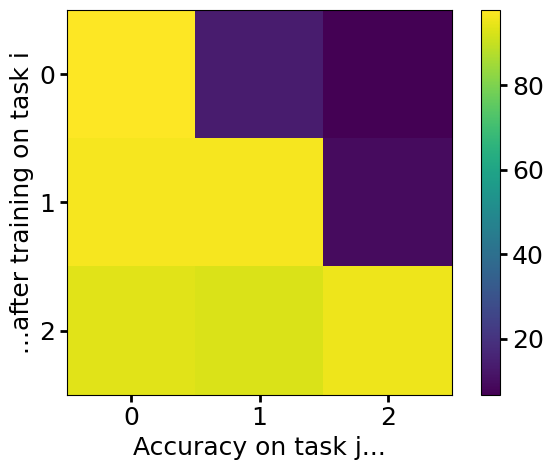

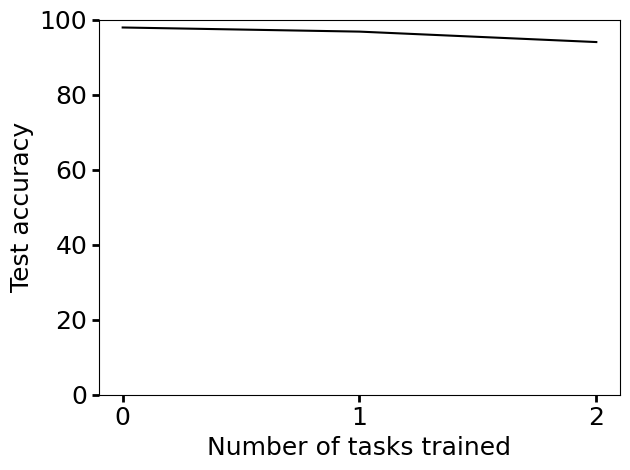

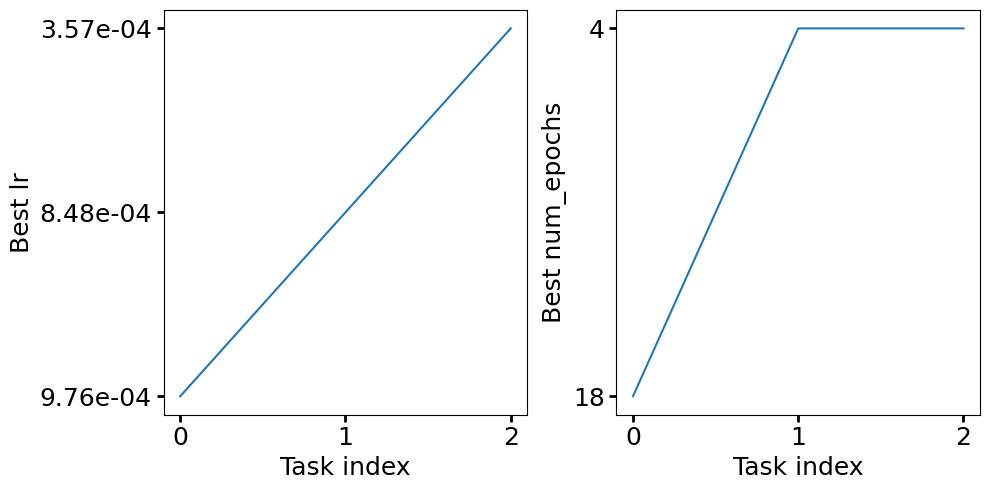

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:30,  5.31s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.31s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:19,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:14,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:37<00:58,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:58<00:37,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:14<00:21,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:30<00:05,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.29s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.29s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.31s/it]

In and out sizes :
fc1 : in = 784, out = 242
fc2 : in = 242, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.30s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.30s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 345
fc2 : in = 345, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 345
fc2 : in = 345, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 345
fc2 : in = 345, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 345
fc2 : in = 345, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.30s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.30s/it]


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:29,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:19,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:13,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:36<00:57,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:58<00:36,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:13<00:21,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:29<00:05,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:34<00:00,  5.28s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 244
fc2 : in = 244, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 244
fc2 : in = 244, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.31s/it]

In and out sizes :
fc1 : in = 784, out = 244
fc2 : in = 244, out = 224
fc3 : in = 224, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.31s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.31s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 244
fc2 : in = 244, out = 224
fc3 : in = 224, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 244
fc2 : in = 244, out = 224
fc3 : in = 224, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 244
fc2 : in = 244, out = 224
fc3 : in = 224, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 244
fc2 : in = 244, out = 224
fc3 : in = 224, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.30s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.30s/it]


BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:29,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:19,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:13,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:36<00:58,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:58<00:36,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:13<00:21,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:15,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:24<00:10,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:29<00:05,  5.28s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.28s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:35<00:00,  5.28s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:15,  5.30s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:15<00:05,  5.29s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.29s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.29s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:17,  5.69s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:10<00:10,  5.46s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.38s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.35s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.39s/it]


BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:29,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:10<01:24,  5.26s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:15<01:18,  5.26s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:13,  5.26s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:26<01:08,  5.26s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:31<01:03,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:36<00:57,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:42<00:52,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:47<00:47,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:52<00:42,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [00:57<00:36,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:03<00:31,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:08<00:26,  5.32s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:14<00:21,  5.37s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:19<00:16,  5.41s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:25<00:10,  5.44s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:30<00:05,  5.46s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:36<00:00,  5.48s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:36<00:00,  5.34s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.58s/it]

In and out sizes :
fc1 : in = 784, out = 249
fc2 : in = 249, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 249
fc2 : in = 249, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 249
fc2 : in = 249, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.54s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 249
fc2 : in = 249, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 249
fc2 : in = 249, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 249
fc2 : in = 249, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.54s/it]

In and out sizes :
fc1 : in = 784, out = 249
fc2 : in = 249, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.54s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]


BENCHMARK 4

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:33,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:11<01:28,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:16<01:22,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:22<01:17,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:27<01:11,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:33<01:06,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:38<01:00,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:44<00:55,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:49<00:49,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:55<00:44,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:00<00:38,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:06<00:33,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:11<00:27,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:17<00:22,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:22<00:16,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:28<00:11,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:33<00:05,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.51s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.52s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.58s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.53s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.54s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.57s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.56s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.56s/it]


BENCHMARK 5

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:33,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:11<01:28,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:16<01:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:22<01:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:27<01:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:33<01:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:38<01:00,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:44<00:55,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:49<00:49,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:55<00:43,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:00<00:38,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:06<00:32,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:11<00:27,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:16<00:21,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:22<00:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:28<00:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:33<00:05,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.51s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.50s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.58s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 259
fc2 : in = 259, out = 211
fc3 : in = 211, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 389
fc2 : in = 389, out = 211
fc3 : in = 211, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.58s/it]

In and out sizes :
fc1 : in = 784, out = 389
fc2 : in = 389, out = 211
fc3 : in = 211, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.59s/it]

In and out sizes :
fc1 : in = 784, out = 389
fc2 : in = 389, out = 211
fc3 : in = 211, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.59s/it]

In and out sizes :
fc1 : in = 784, out = 389
fc2 : in = 389, out = 211
fc3 : in = 211, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.58s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.58s/it]


BENCHMARK 6

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:33,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:10<01:27,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:16<01:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:21<01:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:27<01:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:32<01:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:38<01:00,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:43<00:55,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:49<00:49,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:54<00:44,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:00<00:38,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:06<00:33,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:11<00:27,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:17<00:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:22<00:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:28<00:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:33<00:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.50s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.50s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.54s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.54s/it]

In and out sizes :
fc1 : in = 784, out = 285
fc2 : in = 285, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.53s/it]

In and out sizes :
fc1 : in = 784, out = 285
fc2 : in = 285, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.53s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.53s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 285
fc2 : in = 285, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 285
fc2 : in = 285, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 285
fc2 : in = 285, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 285
fc2 : in = 285, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]


BENCHMARK 7

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:33,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:10<01:27,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:16<01:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:22<01:17,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:27<01:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:32<01:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:38<01:00,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:43<00:54,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:49<00:49,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:54<00:44,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:00<00:38,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:05<00:33,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:11<00:27,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:17<00:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:22<00:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:28<00:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:33<00:05,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.50s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.50s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.57s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.54s/it]

In and out sizes :
fc1 : in = 784, out = 203
fc2 : in = 203, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.53s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.54s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 203
fc2 : in = 203, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.59s/it]

In and out sizes :
fc1 : in = 784, out = 203
fc2 : in = 203, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.58s/it]

In and out sizes :
fc1 : in = 784, out = 203
fc2 : in = 203, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.58s/it]

In and out sizes :
fc1 : in = 784, out = 203
fc2 : in = 203, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.56s/it]


BENCHMARK 8

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:33,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:11<01:28,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:16<01:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:22<01:17,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:27<01:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:33<01:06,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:38<01:00,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:44<00:55,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:49<00:49,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:55<00:43,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:00<00:38,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:05<00:32,  5.49s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:11<00:27,  5.49s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:16<00:21,  5.49s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:22<00:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:27<00:10,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:33<00:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:38<00:00,  5.50s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:38<00:00,  5.50s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.54s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 254
fc2 : in = 254, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.61s/it]

In and out sizes :
fc1 : in = 784, out = 254
fc2 : in = 254, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.59s/it]

In and out sizes :
fc1 : in = 784, out = 254
fc2 : in = 254, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.59s/it]

In and out sizes :
fc1 : in = 784, out = 254
fc2 : in = 254, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.59s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.59s/it]


BENCHMARK 9

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:33,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:11<01:28,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:16<01:22,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:22<01:17,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:27<01:11,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:33<01:06,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:38<01:00,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:44<00:55,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:49<00:49,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:55<00:44,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:00<00:38,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:06<00:33,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:11<00:27,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:17<00:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:22<00:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:28<00:10,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:33<00:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.51s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.51s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 286
fc2 : in = 286, out = 230
fc3 : in = 230, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 286
fc2 : in = 286, out = 230
fc3 : in = 230, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 286
fc2 : in = 286, out = 230
fc3 : in = 230, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.53s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.53s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 480
fc2 : in = 480, out = 230
fc3 : in = 230, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 480
fc2 : in = 480, out = 230
fc3 : in = 230, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 480
fc2 : in = 480, out = 230
fc3 : in = 230, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 480
fc2 : in = 480, out = 230
fc3 : in = 230, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]


BENCHMARK 10

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/18 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


  6%|██████▍                                                                                                            | 1/18 [00:05<01:33,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 11%|████████████▊                                                                                                      | 2/18 [00:11<01:27,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|███████████████████▏                                                                                               | 3/18 [00:16<01:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 22%|█████████████████████████▌                                                                                         | 4/18 [00:22<01:17,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 28%|███████████████████████████████▉                                                                                   | 5/18 [00:27<01:11,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|██████████████████████████████████████▎                                                                            | 6/18 [00:33<01:06,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 39%|████████████████████████████████████████████▋                                                                      | 7/18 [00:38<01:00,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 44%|███████████████████████████████████████████████████                                                                | 8/18 [00:44<00:54,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 9/18 [00:49<00:49,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 56%|███████████████████████████████████████████████████████████████▎                                                  | 10/18 [00:55<00:44,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 61%|█████████████████████████████████████████████████████████████████████▋                                            | 11/18 [01:00<00:38,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████                                      | 12/18 [01:06<00:33,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 13/18 [01:11<00:27,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 14/18 [01:17<00:22,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 15/18 [01:22<00:16,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 16/18 [01:28<00:11,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [01:33<00:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.50s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:39<00:00,  5.50s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 276
fc2 : in = 276, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.54s/it]

In and out sizes :
fc1 : in = 784, out = 276
fc2 : in = 276, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.52s/it]

In and out sizes :
fc1 : in = 784, out = 344
fc2 : in = 344, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.52s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.53s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                            | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 344
fc2 : in = 344, out = 200
fc3 : in = 200, out = 10


 25%|█████████████████████████████                                                                                       | 1/4 [00:05<00:16,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 344
fc2 : in = 344, out = 200
fc3 : in = 200, out = 10


 50%|██████████████████████████████████████████████████████████                                                          | 2/4 [00:11<00:11,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 344
fc2 : in = 344, out = 200
fc3 : in = 200, out = 10


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 3/4 [00:16<00:05,  5.56s/it]

In and out sizes :
fc1 : in = 784, out = 344
fc2 : in = 344, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.55s/it]

## Visualize validation

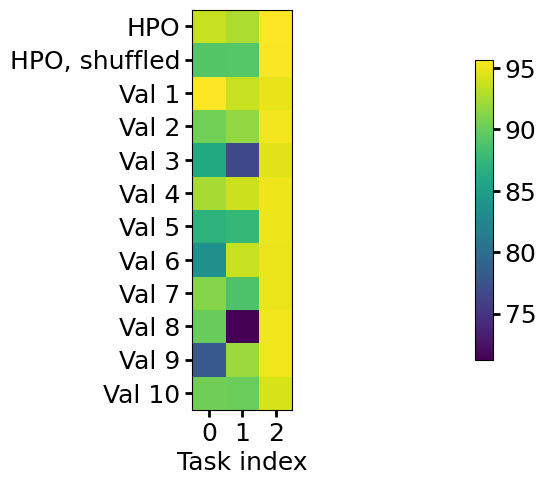

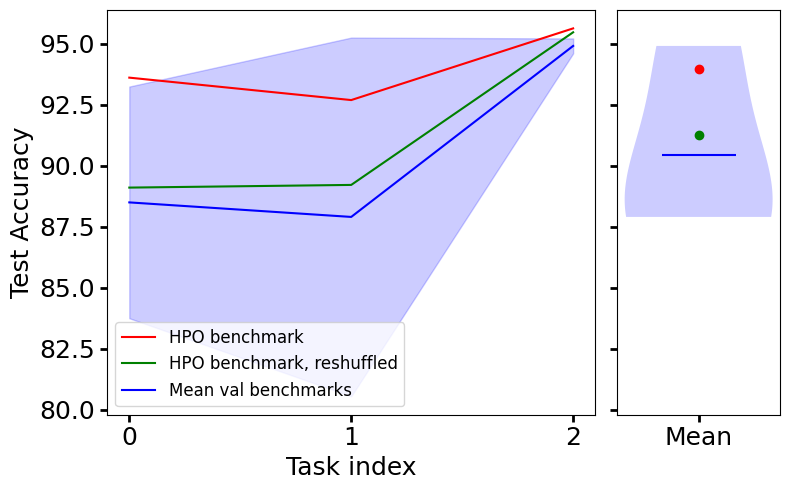

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)